In [4]:
import data_manager as dm
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(font_scale=1.4)
%matplotlib inline

In [5]:
df = dm.load_dataframe("cpl_width.csv")
df.head()
#df = df[df.porosity != 0.9]

,porosity,characteristical_pore_length,wavelet_width,wavelet_width_std
0,0.1,10.0,12.2,1.600000
1,0.1,20.0,19.9,2.800000
2,0.1,30.0,19.6,6.159545
3,0.1,40.0,17.0,14.296853
4,0.1,50.0,9.6,10.632027


Text(0.5, 0, 'Ширина вейвлета')

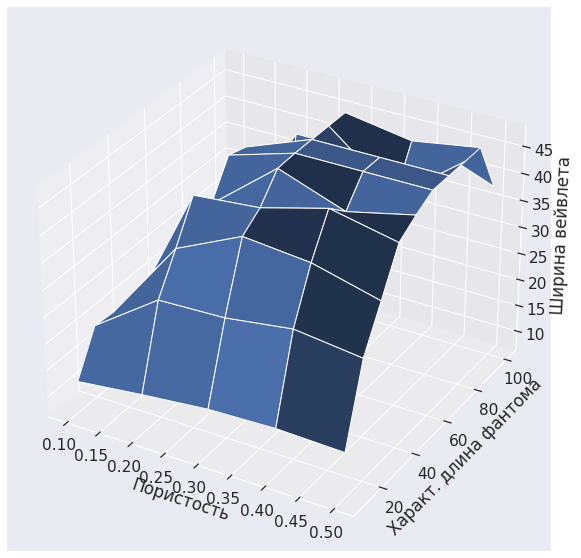

In [6]:
porosities = df.porosity.unique()
characteristical_pore_lengths = df.characteristical_pore_length.unique()

X, Y = np.meshgrid(porosities, characteristical_pore_lengths)

Z = []
for x, y in zip(np.ravel(X), np.ravel(Y)):
    condition = np.logical_and(df.porosity==x, df.characteristical_pore_length==y)
    Z.append(df.loc[condition, 'wavelet_width'])

Z = np.asarray(Z).reshape(X.shape)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z)

ax.set_xlabel('Пористость')
ax.set_ylabel('Характ. длина фантома')
ax.set_zlabel('Ширина вейвлета')

<AxesSubplot:xlabel='porosity'>

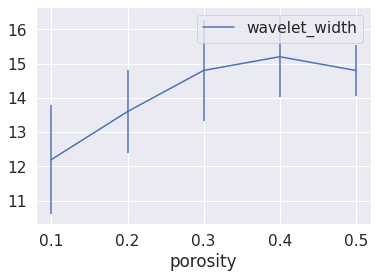

In [7]:
df.groupby("characteristical_pore_length").get_group(10).plot(x='porosity', y='wavelet_width', yerr='wavelet_width_std')

Text(0, 0.5, 'ширина вейвлета')

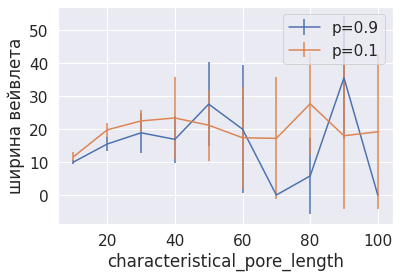

In [6]:
fig, ax = plt.subplots()
df.groupby("porosity").get_group(0.9).plot(x='characteristical_pore_length', y='wavelet_width', yerr='wavelet_width_std', ax=ax, label='p=0.9')
df.groupby("porosity").get_group(0.1).plot(x='characteristical_pore_length', y='wavelet_width', yerr='wavelet_width_std', ax=ax, label='p=0.1')
ax.set_ylabel("ширина вейвлета")

# Поиск близжайших соседей

In [7]:
df.groupby("porosity").get_group(0.3).wavelet_width

20    14.5
21    28.8
22    36.8
23    46.6
24    47.0
25    45.0
26    47.8
27    48.0
28    42.1
29    48.0
Name: wavelet_width, dtype: float64

In [7]:
p_real = 0.25
w_real = 13
# df.iloc[np.abs(df['porosity'].unique()-p_real).argsort()[:2]]

In [11]:
def find_y_between(x_left, x_right,
                   y_left, y_right,
                   x):
    m = (y_left-y_right)/(x_left-x_right)
    b = (x_left*y_right - x_right*y_left)/(x_left-x_right)
    return m*x+b


find_closest = lambda df, column_name, value: df[column_name].unique()[np.abs(df[column_name].unique() - value).argsort()][:2]

def find_pore_length(porosity, wavelet_width):

    closest_porosities = find_closest(df, 'porosity', porosity)

    pore_lengths = []
    for p in closest_porosities:
        pore_length_w = []
        closest_widths = find_closest(df[df.porosity==p], 'wavelet_width', wavelet_width)
        for w in closest_widths:
            condition = np.logical_and(df.porosity==p, df.wavelet_width==w)
            pore_length_w.append(int(df.loc[condition, 'wavelet_width']))
        pore_lengths.append(find_y_between(*closest_widths, *pore_length_w, wavelet_width))
    
    pore_length = find_y_between(*closest_porosities, *pore_lengths, porosity)

    return pore_length

find_pore_length(p_real, w_real)


13.000000000000002

Text(0.5, 0, 'Ширина вейвлета')

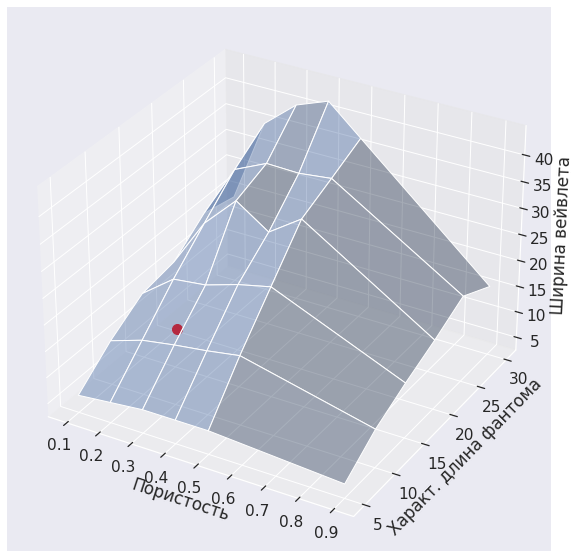

In [12]:
porosities = df.porosity.unique()
characteristical_pore_lengths = df.characteristical_pore_length.unique()

X, Y = np.meshgrid(porosities, characteristical_pore_lengths)

Z = []
for x, y in zip(np.ravel(X), np.ravel(Y)):
    condition = np.logical_and(df.porosity==x, df.characteristical_pore_length==y)
    Z.append(df.loc[condition, 'wavelet_width'])

Z = np.asarray(Z).reshape(X.shape)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, alpha=0.4)
ax.scatter(p_real, w_real, find_pore_length(p_real, w_real), color='red', s=100)

ax.set_xlabel('Пористость')
ax.set_ylabel('Характ. длина фантома')
ax.set_zlabel('Ширина вейвлета')